# Intro to regression with neural network - tensorflow
* predicting a numerical variable based on other combination of variables


In [1]:
import tensorflow as tf
print(tf.__version__)


2.7.0


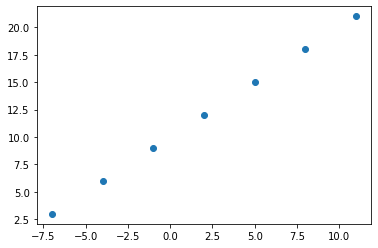

In [2]:
# create data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# create a features
X = np.arange(-7., 14., step=3, dtype=np.float64)

# create labels
y = np.arange(3., 24., step=3, dtype=np.float64)

# visualise it
plt.scatter(X, y)

In [3]:
# depence of X and y
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [4]:
# create a demo tensor for housing prediction tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape


((7,), (7,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
Z = tf.constant(X)
y = tf.constant(y)

X = tf.expand_dims(X, 1) # have to expand dims, from new version of TF, fit() function no longer upscales input data !!!
X, y, Z

(<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.]])>,
 <tf.Tensor: shape=(7,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.])>,
 <tf.Tensor: shape=(7,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.])>)

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape


(TensorShape([7, 1]), TensorShape([7]))

# Steps in modelling in TF
1. Create a model - input and output, hidden layers
2. Compile a model - loss function (how wrong we are), optimizer (how to improve), evaluation metrics
3. Fitting a model - let the model find patterns between X and y (features and labels)

In [9]:
# set random seed
tf.random.set_seed(100)

# 1. create a model using sequential API
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
                              ])
"""
# This is the same as above
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))
model_1.add(tf.keras.layers.Dense(1))
"""

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, # mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
                metrics=["mae"]
                )

"""
# This is the same as above
model_1.compile(loss=tf.keras.losses.mae, # mean absolute error
                optimizer="SGD",
                metrics=["mae"]
                )
"""
# 3. Fit the model
model_1.fit(X, y, epochs=5, verbose=1)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 14.6208 - mae: 14.6208
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 14.4557 - mae: 14.4557
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 14.2906 - mae: 14.2906
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 14.1255 - mae: 14.1255
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 13.9604 - mae: 13.9604


In [10]:
model_1.predict([17.0])
# 4:48:53

array([[-11.345572]], dtype=float32)

# Improve our model
1. **creating a model** 
  - add more layers
  - increase the number of hidden units
  - change the activation functions of each layer
2. **compiling a model** 
  - optimization function
  - learning rate of opitimization function
3. **fitting a model** 
  - train longer
  - more data

In [11]:
 # Lets rebuild our model
tf.random.set_seed(100) 

 # 1 create a model
model_2 = tf.keras.Sequential([
                                tf.keras.layers.Dense(1)
                                ])

# 2 compile it
model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# fit the model
model_2.fit(X, y, epochs=100, verbose=0)


In [12]:
model_2.predict([17.0])

array([[24.264416]], dtype=float32)

In [13]:
tf.random.set_seed(100)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1)  
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(X, y, epochs=500, verbose=0)

In [14]:
model_3.predict([17.0])

array([[30.209711]], dtype=float32)

# Evaluate a model
things that make sense to visualise

* the data - what does the model look like?
* the training of a model - how does the model perform while it learnds
* the prediction of a model - how does the predictons of a model line up with the ground thruth (original labels)


In [15]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
yy = X + 10
y = tf.expand_dims(yy, -1)
y

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-90],
       [-86],
       [-82],
       [-78],
       [-74],
       [-70],
       [-66],
       [-62],
       [-58],
       [-54],
       [-50],
       [-46],
       [-42],
       [-38],
       [-34],
       [-30],
       [-26],
       [-22],
       [-18],
       [-14],
       [-10],
       [ -6],
       [ -2],
       [  2],
       [  6],
       [ 10],
       [ 14],
       [ 18],
       [ 22],
       [ 26],
       [ 30],
       [ 34],
       [ 38],
       [ 42],
       [ 46],
       [ 50],
       [ 54],
       [ 58],
       [ 62],
       [ 66],
       [ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

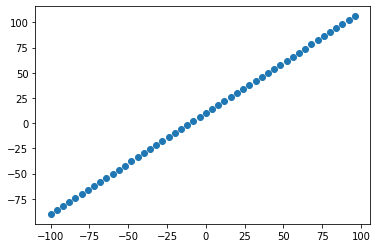

In [17]:
# visualise the data
import matplotlib.pyplot as plt

# plt.plot(X, y) # line made out of complete line
plt.scatter(X, y) # line made out of dots

### The 3 sets
* **training set** - the model learns from this, 70 - 80% of total data I have
* **validation set** - the model gets tuned by this, 10 - 15 % data I have
* **test set** - the model gets evaluated on this, to test what is has learned, 10 - 15% data I have

In [18]:
# check how many samples we have
len(X)


50

In [19]:
# split the data into training and test
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

# Visualise the data


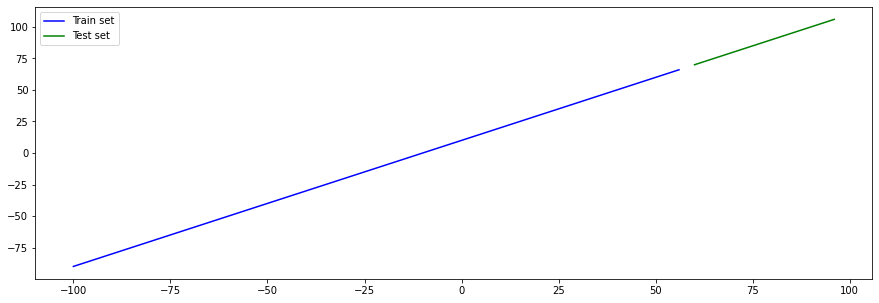

In [20]:
plt.figure(figsize=(15, 5)) # changes the size of a graph
plt.plot(X_train, y_train, color="blue", label="Train set")
plt.plot(X_test, y_test, color="green", label="Test set")
plt.legend() # adds "label" from rows above to the graph

In [21]:
tf.random.set_seed(100)

model_4 = tf.keras.Sequential([
                               #tf.keras.layers.Dense(1), # when getting an error due to dimensions, 
                               #insert input shape code, usually the ml model figures that it self, but sometimes
                               #the shape of the first layer has to be specified manually. 1 Means we are inputting 1 input,
                               #meaning 1 number
                               tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
                               tf.keras.layers.Dense(10, name="middle_layer"),
                               tf.keras.layers.Dense(1, name="output_layer")
                               ], name="model_4")

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

In [22]:
model_4.summary()
# Dense = fully connected neurons,
# Output shape = 1, because we are expecting one output.

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 middle_layer (Dense)        (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_4.fit(X_train, y_train, epochs=100, verbose=0) # With every fit, I should rerun the created model above? Else for example
# after 3x run of model.fit, it would actually run 300 cycles. Guy said 🤔


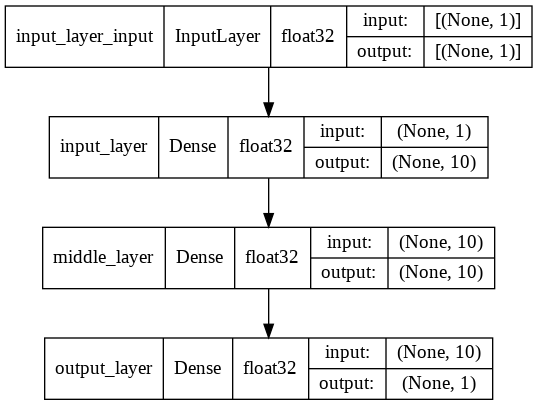

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model=model_4, show_shapes=True, show_dtype=True)
#5:56

# Visualize our model predictions
to visualise predictions it is a good idea to plot them against the ground thruth labels.

in practise it is y_test / y_true VS y_pred

In [25]:
# make some predictions
y_pred = model_4.predict(X_test)
y_pred

array([[55.846992],
       [59.447937],
       [63.048897],
       [66.64985 ],
       [70.2508  ],
       [73.85175 ],
       [77.45271 ],
       [81.053665],
       [84.65462 ],
       [88.25558 ]], dtype=float32)

In [26]:
# lets create a plotting function
def plot_predictions(traing_data=X_train,
                     traing_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(15, 5))
    plt.plot(traing_data, traing_labels, color="blue", label="Training data")
    plt.plot(test_data, test_labels, color="green", label="Test data")
    plt.plot(test_data, predictions, color="red", label="Predictions")
    plt.legend()



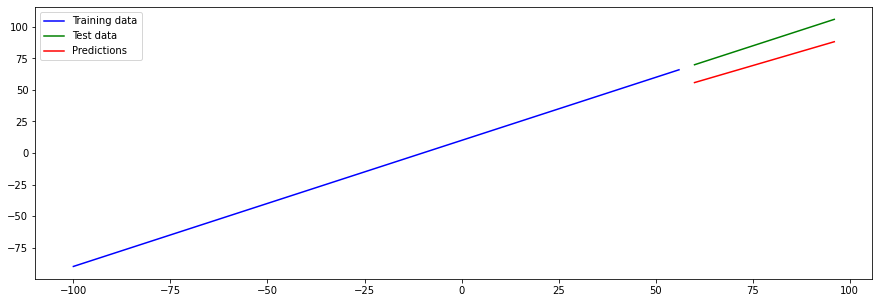

In [27]:
# visualise our models predictions
plot_predictions(traing_data=X_train,
                 traing_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

# Evaluating our model's prediction with regression evaluatinon metrics
depending on the problem you are working on there are different evaluation metrics to check the model's performance

on a regression problem, main two are:
* mae - mean absolute error - on average how wrong are we
* mse - mean square error - "squared the average erros"

In [28]:
# evaluate the model on the test
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 331ms/step - loss: 15.9487 - mae: 15.9487


[15.94871997833252, 15.94871997833252]

In [29]:
# calculate the mean absolute error, but here are combination of tf and numpy arrays and the arrays are not squeezed
tf.math.reduce_sum(tf.keras.losses.MAE(y_test, y_pred)/len(y_test)).numpy()

15.94872

In [30]:
# calculate the mean absolute error, but make the arrays all tensors + they are squeezed
# with this the the equation does not have to be written whole

y_pred = tf.constant(y_pred)
y_test = tf.squeeze(y_test)
y_pred = tf.squeeze(y_pred)

tf.keras.losses.MAE(y_test, y_pred).numpy()


15.94872

In [31]:
# calculate the mean squared error

tf.keras.losses.MSE(y_test, y_pred).numpy()

255.67538

In [32]:
# calculate the Huber
huber = tf.keras.losses.Huber()
huber(y_test, y_pred).numpy()

15.44872

In [33]:
# make some function to reuse MAE and MSE
def mae(y_test, y_pred):
    return tf.keras.losses.MAE(tf.squeeze(y_test), tf.constant(tf.squeeze(y_pred))).numpy()

def mse(y_test, y_pred):
    return tf.keras.losses.MSE(tf.squeeze(y_test), tf.constant(tf.squeeze(y_pred))).numpy()

#running experiments to imporve our model


In [34]:
# model A - same as the original model, 1 layer, trained for 100 epochs
tf.random.set_seed(100)

model_a = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

model_a.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_a.fit(X_train, y_train, epochs=100, verbose=0)

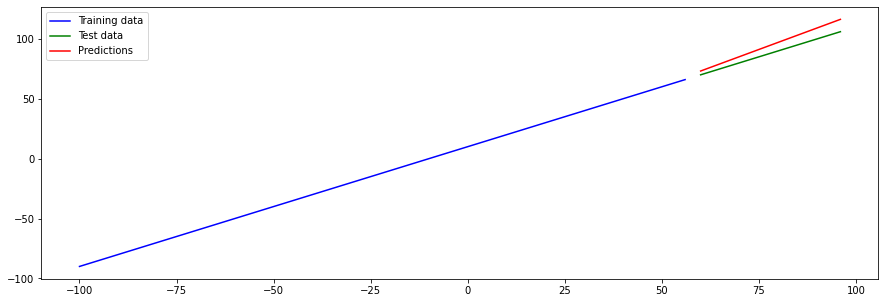

In [35]:
y_preds_1 = model_a.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [36]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

In [37]:
# model B - 2 layers, trained for 100 epochs

tf.random.set_seed(100)

model_b = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape=[1]),
                               tf.keras.layers.Dense(1)])

model_b.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_b.fit(X_test, y_test, epochs=100, verbose=0)

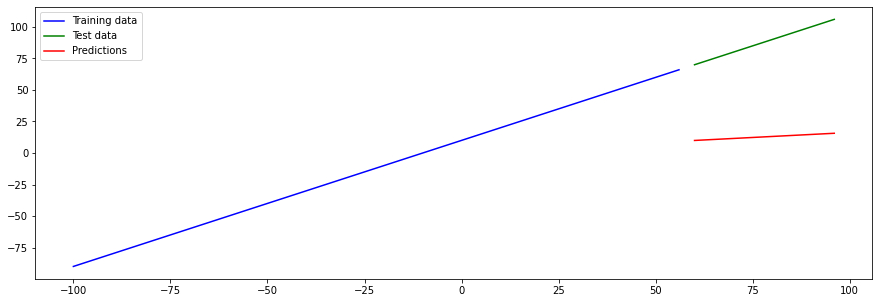

In [38]:
y_preds_2 = model_b.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

In [39]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

In [40]:
# model C - 2 layers - trained for 500 epochs, learning rate

tf.random.set_seed(100)

model_c = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape=[1]),
                               tf.keras.layers.Dense(1)])

model_c.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["mae"])

model_c.fit(X_test, y_test, epochs=500, verbose=0)

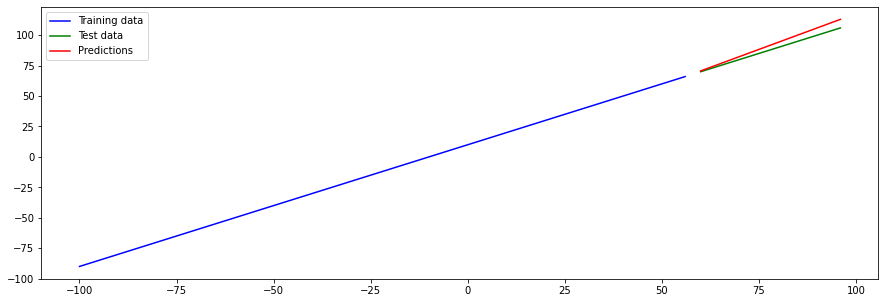

In [41]:
y_preds_3 = model_c.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)

In [42]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

#compare the results
* this is what ml is about - comparing many different models and seein what model performs the best
* one of the main goals is to minimize the time between experiments

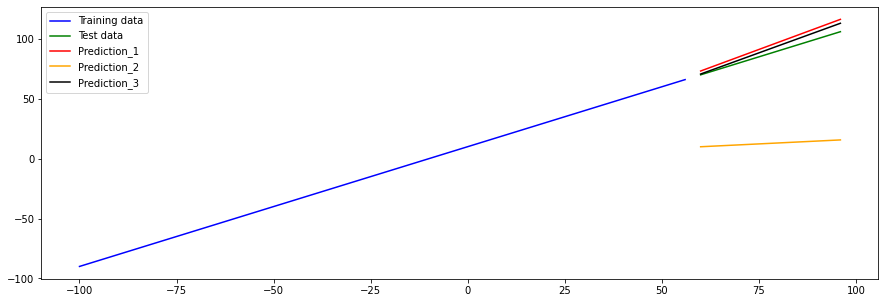

In [43]:
plt.figure(figsize=(15, 5))
plt.plot(X_train, y_train, color="blue", label="Training data")
plt.plot(X_test, y_test, color="green", label="Test data")
plt.plot(X_test, y_preds_1, color="red", label="Prediction_1")
plt.plot(X_test, y_preds_2, color="orange", label="Prediction_2")
plt.plot(X_test, y_preds_3, color="black", label="Prediction_3")
plt.legend()


In [44]:
# compare using pandas
import pandas as pd

model_results = [["Model_1", mae_1, mse_1],
                 ["Model_2", mae_2, mse_2],
                 ["Model_3", mae_3, mse_3]]


all_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
all_results


,Model,MAE,MSE
0,Model_1,6.743742,50.653648
1,Model_2,75.211586,5750.289062
2,Model_3,3.847031,18.939957


  ### tracking your experiments
  * good habit is to track all experiments
  * when doin so, it can be tedious - luckily there are solutions
  * **tensorboard** - part of tensorflow library to track experiments
  * **weights&biases** - (can plug straight into tensorboard)
  

# saving our models
saving our models allows us to use them outside of google colab, such as in web or mobile applicaton...

Two main save formats:
* savedmodel format (default)
* HDF5 format (used out side of this program and in general)

In [45]:
# save model using savedmodel format
model_c.save("model_C_savedmodel_format")

INFO:tensorflow:Assets written to: model_C_savedmodel_format/assets


In [46]:
# save model using HDF5 
model_c.save("model_c_HDF5_format.h5")

# load a model in

In [47]:
# load in the savedmodel format
loaded_savedmodel_fomat = tf.keras.models.load_model("/content/model_C_savedmodel_format")
loaded_savedmodel_fomat.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [48]:
# compare model_c predictions with loaded model
A = model_c.predict(X_test)
B = loaded_savedmodel_fomat.predict(X_test)
A==B

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [49]:
# load in the HDF5 format

loaded_HDF5_model = tf.keras.models.load_model("/content/model_c_HDF5_format.h5")
C = model_c.predict(X_test)
D = loaded_HDF5_model.predict(X_test)
C==D

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger example

In [50]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [51]:
# load in the data set database / file with raw data
# import the file firectly from github


insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
# difference between some dtypes in raw data, our objective is to turn everything into numbers
print(insurance["sex"], insurance["age"], sep="\n"*2)

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64


In [53]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [54]:
# create X and y features
X = insurance_one_hot.drop(labels=["charges", "sex_female", "smoker_no","region_northeast", 
                                   "region_northwest", "region_southeast", "region_southwest"], axis=1)
y = insurance_one_hot["charges"]


In [55]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(len(X), len(X_train), len(X_test))
print(len(y), len(y_train), len(y_test))


1338 1070 268
1338 1070 268


In [56]:
# build a neural network
tf.random.set_seed(100)

insurance_model_1 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)])

insurance_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
history_1 = insurance_model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [57]:
# check the results of insurance model on a test set
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8862.0010 - mae: 8862.0010


[8862.0009765625, 8862.0009765625]

In [58]:
# check some average values of the insurance of the test set
y_test.median(), y_test.mean()

(10075.6295, 14090.992098988803)

In [59]:
# build a neural network
tf.random.set_seed(100)

insurance_model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(1)])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [60]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3819.0125 - mae: 3819.0125


[3819.012451171875, 3819.012451171875]

# plot history - visualise progress of each epoch

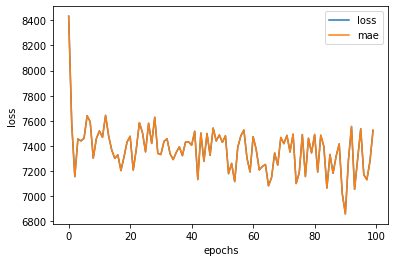

In [61]:
# plot history, also known as a loss curve or a training curve
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Text(0.5, 0, 'epochs')

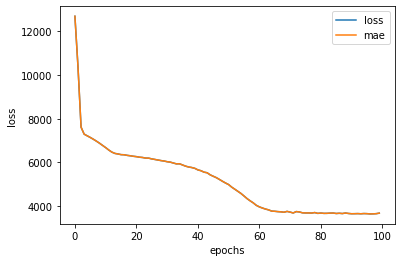

In [62]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### how long shoul you train for?
depends on the problem
but to really find the sweetspot between overfitting and not training long enough,
tensorflow has a solution:

In terms of scaling values, neural networks tend to prefer normalization (turning values between 0 and 1)
* tf.keras.callbacks.EarlyStopping

# Prepocessing data - standartization and normalization


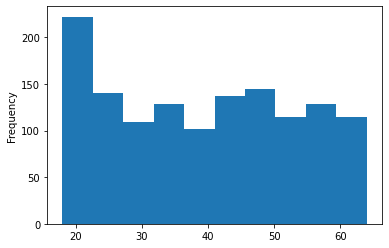

In [63]:
# check the distribution of some columns on a histogram
X["age"].plot(kind="hist")


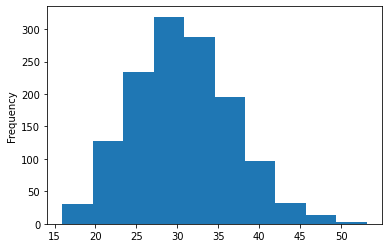

In [64]:
X["bmi"].plot(kind="hist")

In [65]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [66]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# values of each dataset will be between 0 and 1. This cell was done by me, so I am not sure if this is right but whatewa
X = tf.constant(tf.range(start=0, limit=5))
y = X + 1
X = tf.expand_dims(X, -1)
y = tf.expand_dims(y, -1)

ctx = MinMaxScaler()

ctx.fit(X)

X_normal = ctx.transform(X)
 
print(X, X_normal, y, sep="\n"*2)

tf.Tensor(
[[0]
 [1]
 [2]
 [3]
 [4]], shape=(5, 1), dtype=int32)

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]

tf.Tensor(
[[1]
 [2]
 [3]
 [4]
 [5]], shape=(5, 1), dtype=int32)


In [67]:
# lets preprocess our data even more then the first time above
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
# to prepare our data, we can borrow few classes from sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker"])) 

# create X and y
X = insurance.drop(labels=["charges", "region"], axis=1)
y = insurance["charges"]

# bulid our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #random_state=100) # delete shuffle and get back random_state

# fit the ct (columntransformer) to our TRAINING DATA
# whenever you have a column transformer, you have to fit if before you make a transformation
ct.fit(X_train)

# transform training and test data with normalization (minmaxscaler) and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [69]:
# what does our data look like now?
X_train.loc[0]

age             19
sex         female
bmi           27.9
children         0
smoker         yes
Name: 0, dtype: object

In [70]:
X_train.shape, X_train_normal.shape

((1070, 5), (1070, 7))

In [71]:
# Check the first index
X_train_normal[0]

array([0.02173913, 0.32605134, 0.        , 1.        , 0.        ,
       0.        , 1.        ])

In [72]:
#check the data after they are normalised and onehotencoded
X_train_normal, X_test_normal

(array([[0.02173913, 0.32605134, 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.48634626, 0.2       , ..., 1.        , 1.        ,
         0.        ],
        [0.2173913 , 0.4653195 , 0.6       , ..., 1.        , 1.        ,
         0.        ],
        ...,
        [0.45652174, 0.72897324, 0.        , ..., 1.        , 1.        ,
         0.        ],
        [0.97826087, 0.15565265, 0.2       , ..., 1.        , 1.        ,
         0.        ],
        [0.7826087 , 0.43528127, 0.2       , ..., 0.        , 1.        ,
         0.        ]]),
 array([[0.41304348, 0.57646095, 0.2       , ..., 1.        , 0.        ,
         1.        ],
        [0.97826087, 0.42285636, 0.        , ..., 1.        , 1.        ,
         0.        ],
        [0.06521739, 0.41766794, 0.        , ..., 1.        , 1.        ,
         0.        ],
        ...,
        [0.        , 0.5704533 , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.0

In [73]:
# build a neural network
tf.random.set_seed(100)

insurance_model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(1)])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])
history_3 = insurance_model_3.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [74]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3604.3113 - mae: 3604.3113


[3604.311279296875, 3604.311279296875]

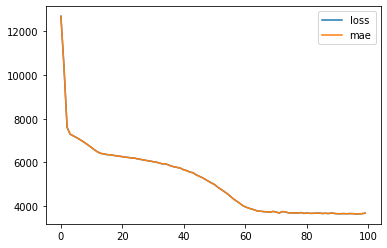

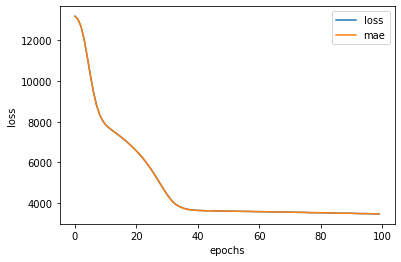

In [75]:
# compare model before and after normalisation and onehotencoding

pd.DataFrame(history_2.history).plot()
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

In [76]:
# check the prediction based on input of all features

# print the labels
print("y_test:", y_test.head(), sep="\n", end="\n"*2)

# feautres must be inserted into prediction in normalised state and in the state they were onehotencoded??? 🤔
print("insurance_model_3:", insurance_model_3.predict(tf.expand_dims(X_test_normal[1], 0))[0][0], sep="\n", end="\n"*2)
print("Difference:", insurance["charges"][1071]-insurance_model_3.predict(tf.expand_dims(X_test_normal[1], 0))[0][0], sep="\n", end="\n"*2)
print("Evaluated:", insurance_model_3.evaluate(X_test_normal, y_test))


y_test:
1070    39871.70430
1071    13974.45555
1072     1909.52745
1073    12096.65120
1074    13204.28565
Name: charges, dtype: float64

insurance_model_3:
12919.754

Difference:
1054.7016437500006

9/9 [==============================] - 0s 3ms/step - loss: 3604.3113 - mae: 3604.3113
Evaluated: [3604.311279296875, 3604.311279296875]


#Basic regression: Predict fuel efficiency

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [78]:
# Get the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 
                'Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


dataset_auto_mpg = raw_dataset.copy()
dataset_auto_mpg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [79]:
# Clean the data
# there are some questionmarks (now transofrmed to n/a in hosrsepower column)
print(dataset_auto_mpg.isna().sum())
print(dataset_auto_mpg.shape)

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
(398, 8)


In [80]:
# drop all the n/a values and print the shape
dataset_auto_mpg = dataset_auto_mpg.dropna()
dataset_auto_mpg.shape

(392, 8)

In [81]:
# onehot encode categorical column
dataset_auto_mpg['Origin'] = dataset_auto_mpg['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset_auto_mpg = pd.get_dummies(dataset_auto_mpg, prefix='', prefix_sep='')
dataset_auto_mpg.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [82]:
# Split the data into training and test sets
train_dataset = dataset_auto_mpg.sample(frac=0.8, random_state=0)
test_dataset = dataset_auto_mpg.drop(train_dataset.index)
len(train_dataset), len(test_dataset)

(314, 78)

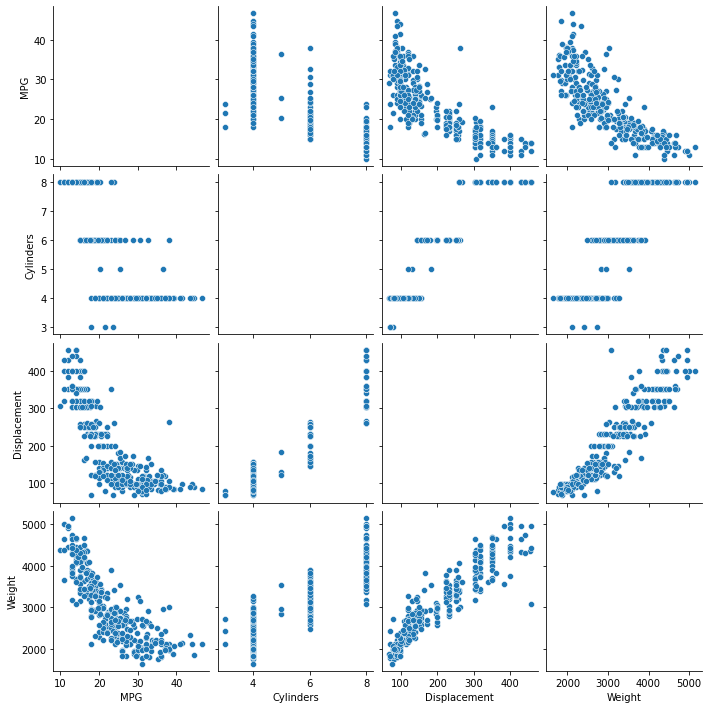

In [83]:
# Inspect the data

# Review the joint distribution of a few pairs of columns from the training set.
# The top row suggests that the fuel efficiency (MPG) is a function of all the other parameters. 
#   The other rows indicate they are functions of each other.

sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='None')

In [84]:
# check overall statistics
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [85]:
# create features and labels for training and testing

X_train = train_dataset.copy()
X_test = test_dataset.copy()

y_train = X_train.pop("MPG")
y_test = X_test.pop("MPG")


In [86]:
# Normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [87]:
# The Normalization layer
# The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

normalizer.mean.numpy()

array([[   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
           0.178,    0.197,    0.624]], dtype=float32)

In [88]:
# some difference between unnormalized data and normalized
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


## Linear regression with one variable

Before building a deep neural network model, start with linear regression using one and several variables.


Begin with a single-variable linear regression to predict 'MPG' from 'Horsepower'.

In [89]:
# First, create a NumPy array made of the 'Horsepower' features. 
# Then, instantiate the tf.keras.layers.Normalization and fit its state to the horsepower data:

horsepower = np.array(X_train['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)


In [90]:
# create keras sequential model
# This model will predict 'MPG' from 'Horsepower'.

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [91]:
# Run the untrained model on the first 10 'Horsepower' values. 
# The output won't be good, but notice that it has the expected shape of (10, 1):
horsepower_model.predict(horsepower[:10])

array([[ 1.047],
       [ 0.591],
       [-1.932],
       [ 1.467],
       [ 1.327],
       [ 0.521],
       [ 1.572],
       [ 1.327],
       [ 0.346],
       [ 0.591]], dtype=float32)

In [92]:
# compile the model

# Once the model is built, configure the training procedure using the Keras Model.compile method. 
# The most important arguments to compile are the loss and the optimizer, 
# since these define what will be optimized (mean_absolute_error) and how (using the tf.keras.optimizers.Adam).

horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [93]:
# fit the model

%%time
history_auto_mpg = horsepower_model.fit(
    X_train['Horsepower'],
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


CPU times: user 3.88 s, sys: 173 ms, total: 4.05 s
Wall time: 5.48 s


In [94]:
# Visualize the model's training progress using the stats stored in the history object:
hist = pd.DataFrame(history_auto_mpg.history)
hist['epoch'] = history_auto_mpg.epoch
hist.tail()

,loss,val_loss,epoch
95,3.807081,4.201246,95
96,3.803584,4.178545,96
97,3.804188,4.164083,97
98,3.804474,4.173236,98
99,3.804859,4.185508,99


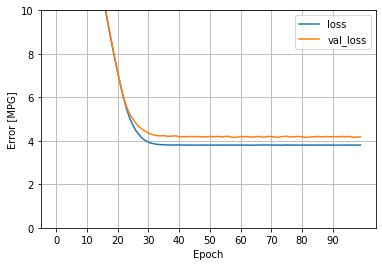

In [95]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xticks(np.arange(0, 100, 10))
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history_auto_mpg)

In [96]:
# store the mea for later display
test_results = {}

test_results['horsepower_model (linear, one feature)'] = horsepower_model.evaluate(
    X_test['Horsepower'],
    y_test, verbose=0)

In [97]:
# create a line space witch represents x value of horsepower
# y will be calculated based on model's prediction

x = tf.linspace(0.0, 250, 5)
print(x)
y = horsepower_model.predict(x)

tf.Tensor([  0.   62.5 125.  187.5 250. ], shape=(5,), dtype=float32)


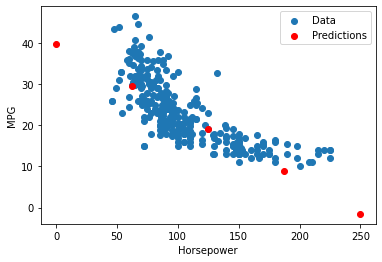

In [98]:
# check feature & label vs predictions
def plot_horsepower(x, y):
  plt.scatter(X_train['Horsepower'], y_train, label='Data')
  plt.scatter(x, y, color='red', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

plot_horsepower(x, y)

## Linear regression with multiple inputs
You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same **y = mx + b** except that **m** is a matrix and **b** is a vector.

Create a two-step Keras Sequential model again with the first layer being normalizer (tf.keras.layers.Normalization(axis=-1)) you defined earlier and adapted to the whole dataset:

In [99]:
# create a model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [100]:
# When you call the model, its weight matrices will be built—check that the kernel weights
# the "m" in y = mx + b have a shape of (9, 1)
linear_model.layers[1].kernel

<tf.Variable 'dense_16/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.609],
       [ 0.535],
       [-0.584],
       [ 0.138],
       [ 0.372],
       [ 0.731],
       [-0.56 ],
       [ 0.731],
       [-0.573]], dtype=float32)>

In [101]:
# compile the model
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [102]:
# fit the model
%%time
history_linear_model = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.83 s, sys: 201 ms, total: 4.03 s
Wall time: 5.51 s


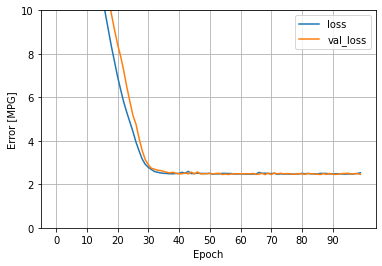

In [103]:
plot_loss(history_linear_model)

In [104]:
# colect the results for later use
test_results['linear_model (multiple feautres)'] = linear_model.evaluate(
    X_test, y_test, verbose=0)
test_results

{'horsepower_model (linear, one feature)': 3.6603376865386963,
 'linear_model (multiple feautres)': 2.46417236328125}

## Regression with a deep neural network (DNN) and single input

In [105]:
# functionised creation of model

def build_and_compile_model(norm):
  model = keras.Sequential([
                            norm,
                            layers.Dense(units=64, activation="relu"),
                            layers.Dense(units=64, activation="relu"),
                            layers.Dense(units=1)
  ])
  model.compile(loss="mae",
                optimizer=keras.optimizers.Adam(learning_rate=0.001))
  return model

In [106]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_17 (Dense)            (None, 64)                128       
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [107]:
# fit the model
%%time
history_dnn_horsepower_model = dnn_horsepower_model.fit(
    X_train['Horsepower'],
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.37 s, sys: 194 ms, total: 4.57 s
Wall time: 5.57 s


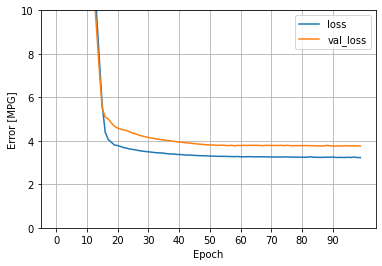

In [108]:
plot_loss(history_dnn_horsepower_model)

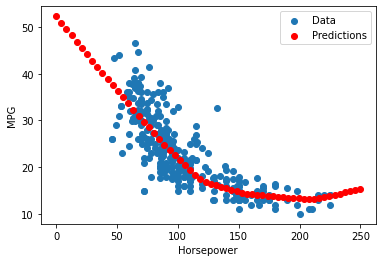

In [109]:
# check features & label vs predictions
x = tf.linspace(0.0, 250, 60)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)

In [110]:
# save resutls for later display
test_results['dnn_horsepower_model (single feature)'] = dnn_horsepower_model.evaluate(
    X_test['Horsepower'], y_test,
    verbose=0)
test_results

{'dnn_horsepower_model (single feature)': 2.873143434524536,
 'horsepower_model (linear, one feature)': 3.6603376865386963,
 'linear_model (multiple feautres)': 2.46417236328125}

## Regression using a DNN and multiple inputs

In [111]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_20 (Dense)            (None, 64)                640       
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [112]:
%%time
history_dnn_model = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.65 s, sys: 227 ms, total: 4.87 s
Wall time: 4.29 s


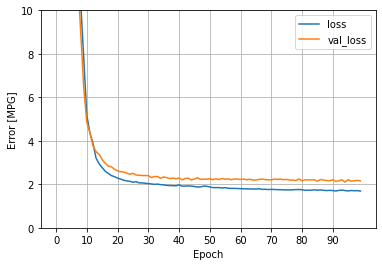

In [113]:
plot_loss(history_dnn_model)

In [114]:
test_results['dnn_model (multiple features)'] = dnn_model.evaluate(X_test, y_test, verbose=0)
test_results

{'dnn_horsepower_model (single feature)': 2.873143434524536,
 'dnn_model (multiple features)': 1.6838082075119019,
 'horsepower_model (linear, one feature)': 3.6603376865386963,
 'linear_model (multiple feautres)': 2.46417236328125}

## Performance

In [115]:
# check the mae of all the models
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).transpose()

,Mean absolute error [MPG]
"horsepower_model (linear, one feature)",3.660338
linear_model (multiple feautres),2.464172
dnn_horsepower_model (single feature),2.873143
dnn_model (multiple features),1.683808


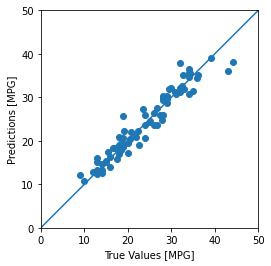

In [116]:
# line should be centred in the points (at least that is what i think)

y_pred = dnn_model.predict(X_test).flatten()

plt.axes(aspect='equal') # make the grapgh equal in size
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50] # size of charts
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

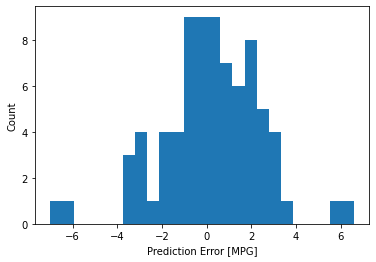

In [117]:
# check how much off is the prediction against actual values

error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')